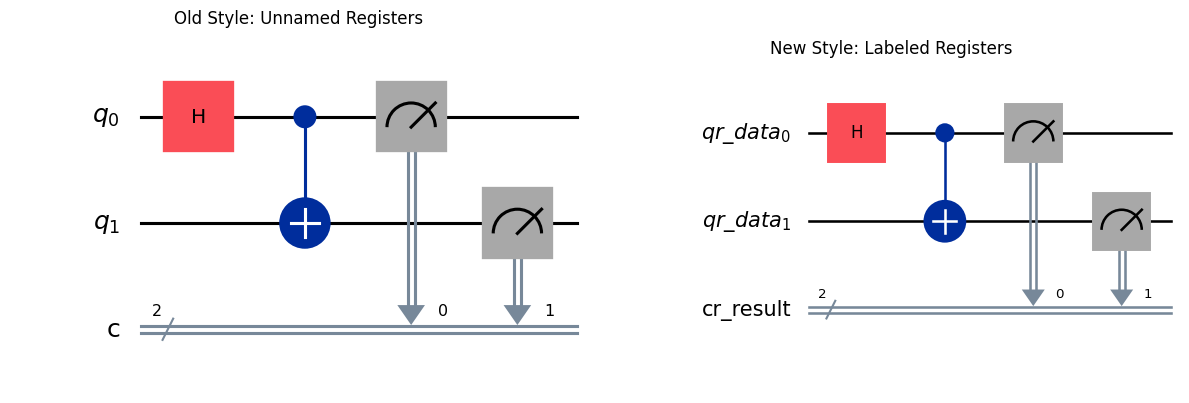

In [8]:
# Introducing explicit quantum and classical registers
# This is essential for writing scalable, maintainable, and hardware-aware quantum code 
# ----------------------------------------------------------------------
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Method 1: Old Style (Simple but limited)
qc_old = QuantumCircuit(2, 2)
qc_old.h(0)
qc_old.cx(0, 1)
qc_old.measure([0, 1], [0, 1])

# Method 2: New Style (More structured) # The new style definition is more easier to track roles in complex circuits
qr = QuantumRegister(2, 'qr_data')
cr = ClassicalRegister(2, 'cr_result')
qc_new = QuantumCircuit(qr, cr)
qc_new.h(qr[0])
qc_new.cx(qr[0], qr[1])
qc_new.measure(qr, cr)

# Plot side-by-side
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0])
ax1.set_title("Old Style: Unnamed Registers")
qc_old.draw(output='mpl', ax=ax1)

ax2 = fig.add_subplot(gs[1])
ax2.set_title("New Style: Labeled Registers")
qc_new.draw(output='mpl', ax=ax2)

plt.tight_layout()
plt.show()


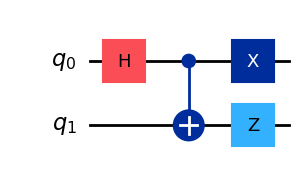

In [4]:
# Example of compose circuits: Adds one circuit into another, at a specific spot. May overwrite gates unless positioned
# When is usefull? 
# - Build reusable circuit blocks (e.g., a “prepare state” step or a custom oracle)
# - Separate logic into layers, then combine
# - Avoid rewriting code for the same operation
# --------------------------------------------------------------------
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt

# Create a base circuit with 2 qubits
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)

# Create another 2-qubit circuit (a small routine to insert)
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.z(1)

# Compose qc2 *into* qc1
composed = qc1.compose(qc2)
composed.draw('mpl')


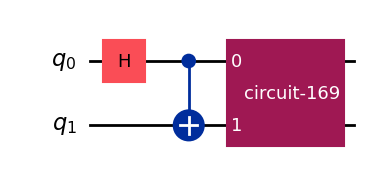

In [5]:
# Example of append circuits: Appends a circuit to the end of another, qubit-wise. Adds to the end, cleanly
# When is usefull? 
# - Build reusable circuit blocks (e.g., a “prepare state” step or a custom oracle)
# - Separate logic into layers, then combine
# - Avoid rewriting code for the same operation
# --------------------------------------------------------------------
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt

# Create a base circuit with 2 qubits
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)

# Create another 2-qubit circuit (a small routine to insert)
qc2 = QuantumCircuit(2)
qc2.x(0)
qc2.z(1)

# Append qc2 to the end of qc1
appended = qc1.copy()
appended.append(qc2, [0, 1])  # specify the mapping
appended.draw('mpl')


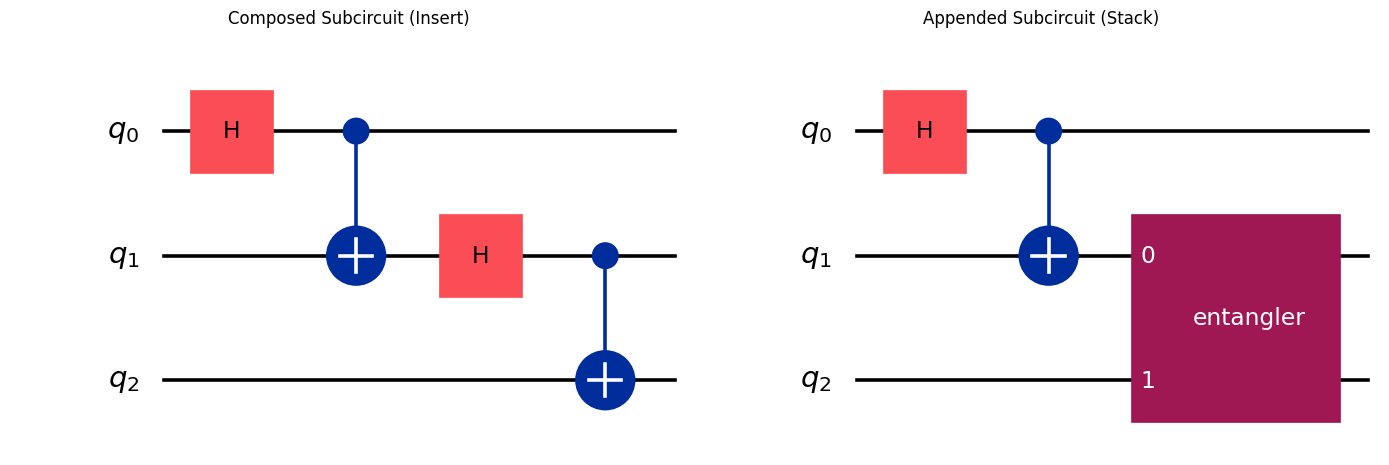

In [9]:
# This code demonstrates how to compose and append a more complex subcircuit
# (e.g., an entangling block) into a larger quantum circuit.
# We use 3 qubits in the main circuit and a 2-qubit entangler subcircuit.
# -----------------------------------------------------------------------------

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Step 1: Create the main 3-qubit circuit
# This circuit starts with 3 qubits. Creates entanglement between qubit 0 and qubit 1
qc_main = QuantumCircuit(3)
qc_main.h(0)         # Put qubit 0 into superposition: (|0⟩ + |1⟩)/√2
qc_main.cx(0, 1)     # Entangle qubit 0 and 1: → (|00⟩ + |11⟩)/√2 on qubits 0-1

# Step 2: Create a reusable 2-qubit entangling subcircuit: A separate 2-qubit block that creates a Bell state from scratch.
# We'll later insert this onto qubits 1 and 2 of the main circuit
qc_sub = QuantumCircuit(2, name="entangler")
qc_sub.h(0)          # Superposition on subcircuit's qubit 0
qc_sub.cx(0, 1)      # Entangle subcircuit's qubits 0 and 1

# Step 3: Compose the subcircuit into the main one (applied to qubits 1 and 2)
# This "inserts" the subcircuit into the circuit, potentially overlapping with earlier gates
composed = qc_main.compose(qc_sub, qubits=[1, 2])

# Step 4: Append the same subcircuit to the end of a fresh copy of qc_main
# This adds the entire subcircuit *after* everything already in qc_main
appended = qc_main.copy()
appended.append(qc_sub, [1, 2])  # Specify the target qubits

# Step 5: Plot both circuits side by side to compare
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0])
ax1.set_title("Composed Subcircuit (Insert)")
composed.draw(output='mpl', ax=ax1)

ax2 = fig.add_subplot(gs[1])
ax2.set_title("Appended Subcircuit (Stack)")
appended.draw(output='mpl', ax=ax2)

plt.tight_layout()
plt.show()
